In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define cities (coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}
N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

In [2]:

# Step 3: Route Distance Function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[i+1]] for i in range(N - 1)) + distance_matrix[route[-1]][route[0]]

In [3]:
# Step 4: PSO Parameters
NUM_PARTICLES = 50
MAX_ITER = 200
W = 0.8        # Inertia
C1 = 1.5       # Cognitive component
C2 = 1.5       # Social component

In [4]:
# Particle representation
class Particle:
    def __init__(self):
        self.position = random.sample(range(N), N)
        self.velocity = []
        self.best_position = self.position[:]
        self.best_score = route_distance(self.position)

    def update_velocity(self, gbest):
        velocity = []
        for i in range(N):
            if self.position[i] != gbest[i]:
                swap_index = self.position.index(gbest[i])
                velocity.append((i, swap_index))
                # Apply swap immediately to track current position
                self.position[i], self.position[swap_index] = self.position[swap_index], self.position[i]
        self.velocity = velocity

    def apply_velocity(self):
        for (i, j) in self.velocity:
            self.position[i], self.position[j] = self.position[j], self.position[i]
        self.velocity = []

    def evaluate(self):
        cost = route_distance(self.position)
        if cost < self.best_score:
            self.best_score = cost
            self.best_position = self.position[:]

In [5]:
# Step 5: PSO main loop
swarm = [Particle() for _ in range(NUM_PARTICLES)]
global_best = min(swarm, key=lambda p: p.best_score)
gbest_position = global_best.best_position[:]
gbest_score = global_best.best_score
cost_history = []

In [11]:
swarm[1].best_position

[4, 1, 0, 2, 3, 5]

In [12]:
for iteration in range(MAX_ITER):
    for particle in swarm:
        particle.update_velocity(gbest_position)
        particle.apply_velocity()
        particle.evaluate()

    current_best = min(swarm, key=lambda p: p.best_score)
    if current_best.best_score < gbest_score:
        gbest_position = current_best.best_position[:]
        gbest_score = current_best.best_score

    cost_history.append(gbest_score)

# Step 6: Output
print("Best route found:", gbest_position)
print("Minimum distance:", gbest_score)

Best route found: [2, 0, 1, 3, 4, 5]
Minimum distance: 25.17945989469863


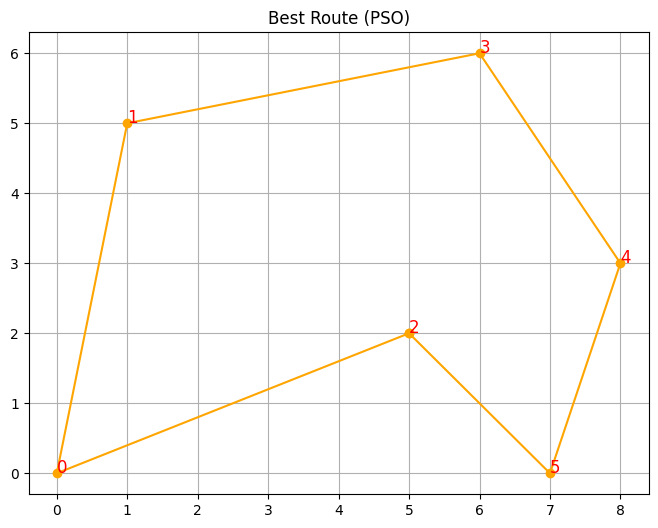

In [13]:
# Visualize best route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='orange')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (PSO)")
    plt.grid()
    plt.show()

plot_route(gbest_position)